<a href="https://colab.research.google.com/github/TVanReeth/corrections/blob/master/frb_ML_demo_NAC2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sys

import numpy as np
import matplotlib.pylab as plt
from numpy.random import seed
import h5py

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Concatenate
from keras.layers import Conv1D, Conv2D
from keras.layers import MaxPooling2D, MaxPooling1D, GlobalAveragePooling1D, \
                         BatchNormalization
from keras.optimizers import SGD
from keras.models import load_model
from sklearn import datasets, svm, metrics

from IPython.display import Image
from google.colab.patches import cv2_imshow
import cv2

Using TensorFlow backend.


In [ ]:
!pip install wget

import wget
wget.download('http://alert.eu/training_data_freqtime.hdf5')
wget.download('http://alert.eu/FRB121102-easnac-demo.hdf5')

'FRB121102-easnac-demo (2).hdf5'

# **Classifying MNIST hand-written digits**

**The 'hello world' of deep learning exercises**

In [ ]:
# x,y correspond to the data and labels respectively
fnm="mnist.npz"
(x_train, y_train),(x_test_mnist, y_test_mnist)=tf.keras.datasets.mnist.load_data(path=fnm)
x_train = x_train[..., None]
x_test_mnist = x_test_mnist[..., None]

ntrain = x_train.shape[0]
ntest = x_test_mnist.shape[0]
print(x_train.shape, x_test_mnist.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


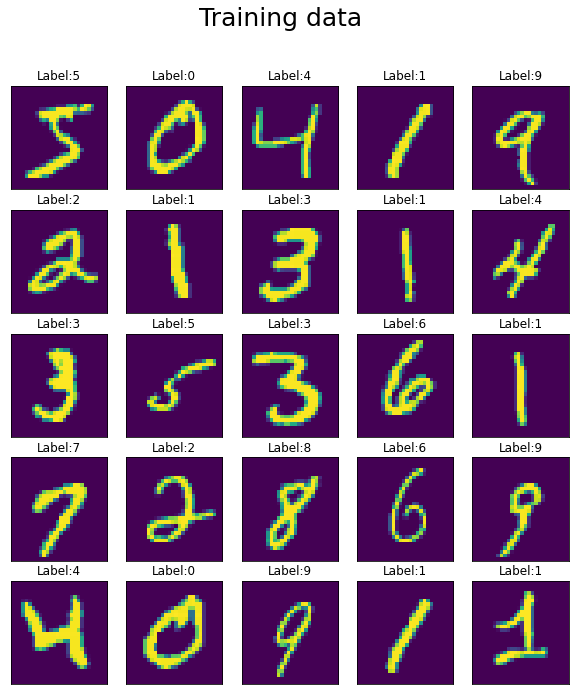

In [ ]:
plt.figure(figsize=(10,11))

for ii in range(25):
  plt.subplot(5,5,ii+1)
  plt.imshow(x_train[ii,:,:,0], aspect='auto')
  plt.yticks([])
  plt.xticks([])
  plt.title('Label:%d'%y_train[ii])

plt.suptitle('Training data', fontsize=25)
plt.show()

In [ ]:
# Set input image size
image_height = 28
image_width = 28
num_classes = 10
num_channels = 1

# Convert labels into length-10 vectors 
# e.g. the number 7 will now be [0,0,0,0,0,0,1,0,0,0]
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test_mnist)

#**Define in keras a sequential model and start adding layers**


#**Its architecture will be something like this:**

In [ ]:
Image(url="https://miro.medium.com/max/3744/1*SGPGG7oeSvVlV5sOSQ2iZw.png", width=900, height=400)

In [ ]:
Image(url="https://miro.medium.com/max/1400/1*XxxiA0jJvPrHEJHD4z893g.png")

In [ ]:
model_MNIST = Sequential()

In [ ]:
model_MNIST.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                  input_shape=(image_height, image_width, num_channels)))
model_MNIST.add(MaxPooling2D(pool_size=(2,2)))
print(model_MNIST.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_MNIST.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model_MNIST.add(MaxPooling2D(pool_size=(2,2)))
model_MNIST.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model_MNIST.add(MaxPooling2D(pool_size=(2,2)))
model_MNIST.add(Flatten())
print(model_MNIST.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)              

#**We now have three convolutional layers and can add the classification layers**

In [ ]:
# Densely connected layers
model_MNIST.add(Dense(128, activation='relu'))
# output layer
model_MNIST.add(Dense(num_classes, activation='softmax'))
print(model_MNIST.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)              

In [ ]:
# compile with adam optimizer & categorical_crossentropy loss function
model_MNIST.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

In [ ]:
# train the model with the method "fit"
# let's save time by only using every 5th training image...
results = model_MNIST.fit(x_train[::5], y_train_cat[::5], 
                          epochs=3, batch_size=64,
                          validation_data=(x_test_mnist, y_test_cat))

Train on 12000 samples, validate on 10000 samples
Epoch 1/3
12000/12000 [==============================] - 21s 2ms/step - loss: 1.1052 - accuracy: 0.8249 - val_loss: 0.1753 - val_accuracy: 0.9429
Epoch 2/3
12000/12000 [==============================] - 20s 2ms/step - loss: 0.1282 - accuracy: 0.9609 - val_loss: 0.1214 - val_accuracy: 0.9622
Epoch 3/3
12000/12000 [==============================] - 20s 2ms/step - loss: 0.0725 - accuracy: 0.9762 - val_loss: 0.1254 - val_accuracy: 0.9627


#**Let's visually inspect its predictions.**

#**Try running the next cell a few different times to see its classification and the assigned probability**


Text(1, 3.5, 'prob = 1.000')

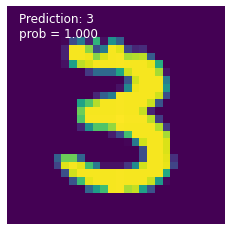

In [ ]:
ind = np.random.randint(0, len(x_test_mnist))
prob = model_MNIST.predict(x_test_mnist[None,ind])[0]
val = np.argmax(prob)
fig = plt.figure()

plt.imshow(x_test_mnist[ind,:,:,0])
plt.axis('off')
plt.text(1,1.5,'Prediction: {}'.format(val),c='white', fontsize=12)
plt.text(1,3.5,'prob = {:.3f}'.format(prob[val]),c='white', fontsize=12)

# On to FRBs...

In [ ]:
Image(url='https://i.pinimg.com/originals/55/41/49/554149fc0b8b6cadf5a7acac87d7ee15.jpg',width=500,height=300)

In [ ]:
Image(url='https://media.tenor.com/images/22871c1d6803bea2de418ba66013c5cb/tenor.gif', width=500, height=300)

# Detecting the first repeating fast radio burst, FRB121102

**Our task is going to be as follows:**

*   Download real FRB data for FRB121102, found by Apertif
*   Download training data consisting of false triggers from RFI, simulated FRBs injected into real noise, and single pulses from Galactic pulsars
*   Build and train a classifier from the training data
*   Classify the 121102 bursts



# **Let's inspect the FRB121102 data. These are 20 bursts discovered by Apertif from the first known repeating source**

See https://arxiv.org/abs/1912.12217 for Oostrum et al. 2019

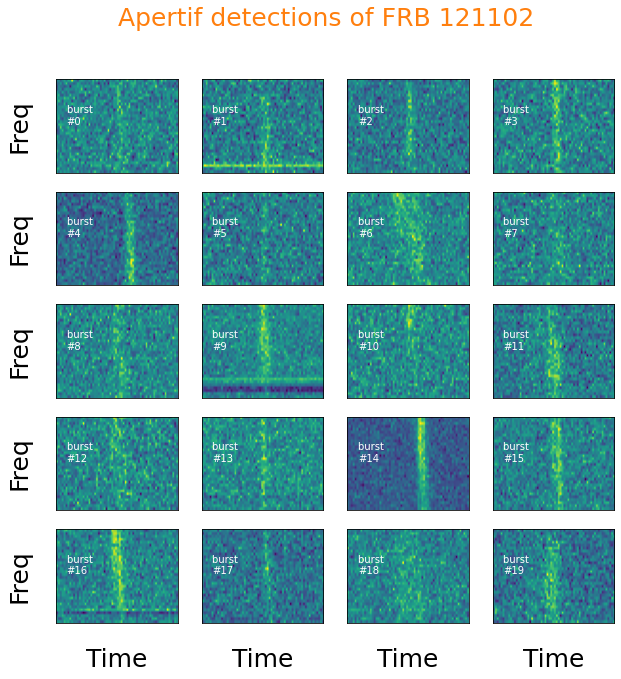

In [ ]:
f = h5py.File('FRB121102-easnac-demo.hdf5','r')
data_121102 = f['data_freq_time'][:]

ncand_121102, nfreq, nt = data_121102.shape
plt.figure(figsize=(10,10))

for ii in range(ncand_121102):
    plt.subplot(5,4,ii+1)
    plt.imshow(data_121102[ii, :, nt//2-32:nt//2+32], aspect='auto')
#    plt.title('Prob=%0.2f' % prob_of_frb[ii,1])
    plt.yticks([])
    plt.xticks([])
    if ii%4==0:
        plt.ylabel('Freq', fontsize=25, labelpad=25)
    if ii>15:
        plt.xlabel('Time', fontsize=25, labelpad=25)
    plt.text(5, 15, "burst \n#%d"%ii, color='white')

plt.suptitle("Apertif detections of FRB 121102", color='C1', fontsize=25)
plt.show()

In [ ]:
Image(url="https://www.astronomie.nl/upload/645x420/images/Telescopen/WSRT.png")

In [ ]:
Image(url="https://assets-cdn-folia.boondrive.com/940/11285_1520508326125_Leon%20Oostrum.jpg", height=250, width=250)

## **Load the labelled training data. The data labelled "0" are false triggers from Apertif that were due to radio frequency interference (RFI) or noise fluctuations. The data labelled "1" are either Galactic pulsars or simulated FRBs injected into real telescope data.**

In [ ]:
f_freq = h5py.File('training_data_freqtime.hdf5','r')

data_ft = f_freq['data_freq_time'][:]
labels = f_freq['labels'][:]

ncand = len(labels)
nfreq,ntime = data_ft.shape[1:]

# **If we look at the candidates the way a standard FRB detection pipeline sees them, as a one-dimensional pulse profile, we notice that RFI and FRBs are hard to distinguish**



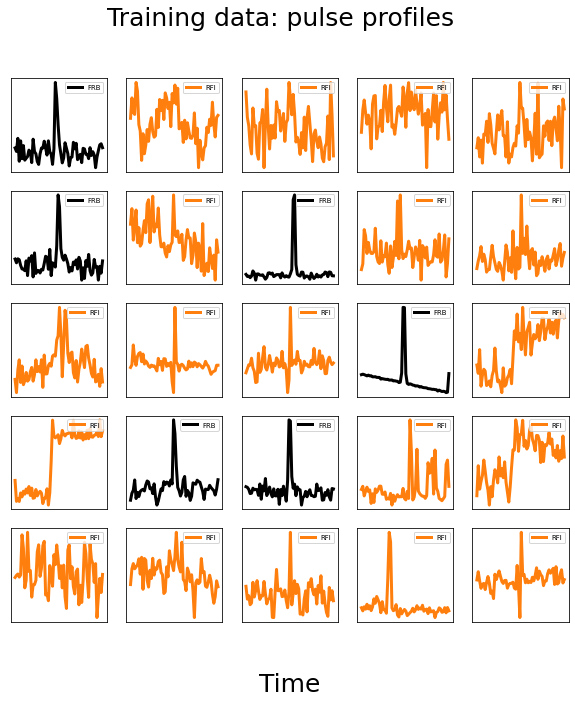

In [ ]:
ind = np.random.randint(0,ncand,25)
fig = plt.figure(figsize=(10,10))

for ii in range(25):
    plt.subplot(5,5,ii+1)
    plt.yticks([])
    plt.xticks([])
    if ii==22:
        plt.xlabel('Time', fontsize=25, labelpad=50)
    if labels[ind[ii]]==1:
        plt.plot(data_ft[ind[ii]].mean(0), color='k', lw=3)
        plt.legend(['FRB'], loc=1, fontsize=7)
    else:
        plt.plot(data_ft[ind[ii]].mean(0), color='C1', lw=3)
        plt.legend(['RFI'], loc=1, fontsize=7)
plt.suptitle('Training data: pulse profiles', fontsize=25)
plt.show()

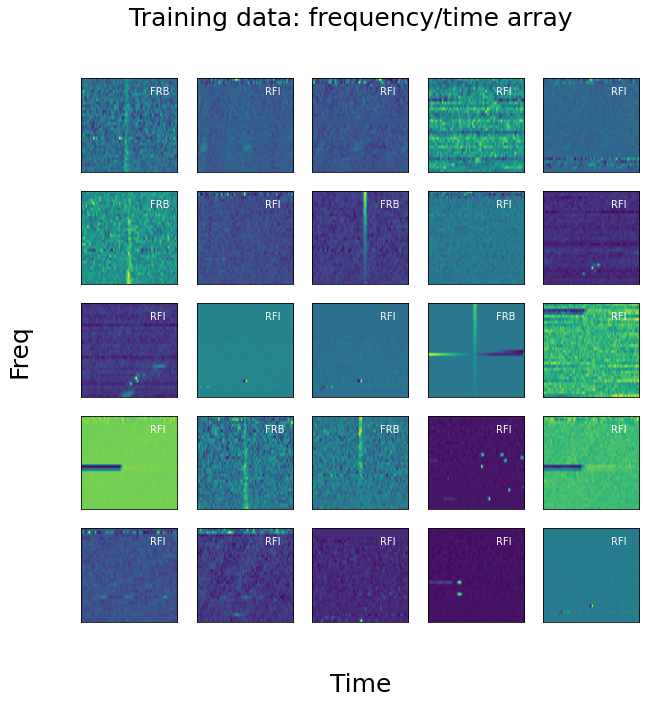

In [ ]:
fig = plt.figure(figsize=(10,10))
for ii in range(25):
    plt.subplot(5,5,ii+1)
    plt.imshow(data_ft[ind[ii]],aspect='auto')
    plt.yticks([])
    plt.xticks([])
    if ii==10:
        plt.ylabel('Freq', fontsize=25, labelpad=50)
    if ii==22:
        plt.xlabel('Time', fontsize=25, labelpad=50)
    if labels[ind[ii]]==1:
        plt.text(45,5,'FRB',color='white')
    else:
        plt.text(45,5,'RFI',color='white')
plt.suptitle('Training data: frequency/time array', fontsize=25)
plt.show()

# **Read in the Apertif data and divide it into a training set and a test set** 

In [ ]:
# Randomly divide the data into a training and test set
train_size = 0.25
ntrain = int(train_size*ncand)
ind = np.arange(ncand)
np.random.shuffle(ind)

ind_train = ind[:ntrain]
ind_test = ind[ntrain:]

# Define training and test data tensors
x_train = data_ft[ind_train,:,:,None]
x_test = data_ft[ind_test,:,:,None]

y_train = keras.utils.to_categorical(labels[ind_train])
y_test = keras.utils.to_categorical(labels[ind_test])

# **We now have a labelled training set with ~20k FRB candidates**

# **Try and build a machine learning model (2D CNN, e.g.) that can classify the FRB 121102 bursts!**

# **Below are a couple of example functions, but try out whatever architecture you like. Can you can alter the MNIST model to have to train on the FRB data? What about more traditional ML algorithms that don't rely on deep neural networks?**

In [ ]:
# Example 2D CNN
def construct_svm(train_data, train_labels, eval_data, eval_labels):
    """ Train a simple support vector machine
    """
    x_train = train_data.copy()
    y_train = train_labels.copy()
    x_test = eval_data.copy()
    y_test = eval_labels.copy() 

    if len(x_train.shape)!=2:
      x_train = x_train.reshape(len(x_train), -1)
    if len(x_test.shape)!=2:
      x_test = x_test.reshape(len(x_test), -1)
    if len(y_train.shape)==2:
      y_train = y_train[:,1]
    if len(y_test.shape)==2:
      y_test = y_test[:,1]

    model_SVM = svm.SVC(gamma=0.001)
    model_SVM.fit(x_train, y_train) 

    if eval_data is None:
      return model_SVM, None, None

    predicted = model_SVM.predict(x_test)
#    disp = metrics.plot_confusion_matrix(model_SVM, x_test, y_test)

    return model_SVM, y_test, predicted

def construct_conv2d(features_only=False, fit=False, 
                     train_data=None, train_labels=None,
                     eval_data=None, eval_labels=None, 
                     nfreq=16, ntime=250, epochs=5,
                     nfilt1=32, nfilt2=64, batch_size=32, ncategories=None):
    """ Build a two-dimensional convolutional neural network
    with a binary classifier. Can be used for, e.g.,
    freq-time dynamic spectra of pulsars, dm-time intensity array.
    Parameters:
    ----------
    features_only : bool 
        Don't construct full model, only features layers 
    fit : bool 
        Fit model 
    train_data : ndarray
        (ntrain, ntime, 1) float64 array with training data
    train_labels :  ndarray
        (ntrigger, 2) binary labels of training data [0, 1] = FRB, [1, 0]=RFI 
    eval_data : ndarray
        (neval, ntime, 1) float64 array with evaluation data
    eval_labels : 
        (neval, 2) binary labels of eval data 
    epochs : int 
        Number of training epochs 
    nfilt1 : int
        Number of neurons in first hidden layer 
    nfilt2 : int 
        Number of neurons in second hidden layer 
    batch_size : int 
        Number of batches for training   
    Returns
    -------
    model : XX
    score : np.float 
        accuracy, i.e. fraction of predictions that are correct 
    """

    if train_data is not None:
        nfreq=train_data.shape[1]
        ntime=train_data.shape[2]
        
    if train_labels is not None:
        if ncategories is None:
            ncategories = train_labels.shape[1]

    model = Sequential()
    # this applies 32 convolution filters of size 5x5 each.
    model.add(Conv2D(nfilt1, (3, 3), activation='relu', 
                     input_shape=(nfreq, ntime, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Randomly drop some fraction of nodes (set weights to 0)
    model.add(Dropout(0.4)) 
    model.add(Conv2D(nfilt2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.4)) 
    model.add(Flatten())

    if features_only is True:
        model.add(BatchNormalization()) 
        return model, [] 

    model.add(Dense(1024, activation='relu')) # should be 1024 hack

    model.add(Dropout(0.5))
    model.add(Dense(ncategories, activation='softmax'))

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy', 
                  optimizer=sgd, metrics=['accuracy'])

    if fit is True:
        print("Using batch_size: %d" % batch_size)
        print("Using %d epochs" % epochs)
        cb = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, 
                                         batch_size=32, write_graph=True, 
                                         write_grads=False, 
                                         write_images=True, embeddings_freq=0, 
                                         embeddings_layer_names=None, 
                                         embeddings_metadata=None)

        model.fit(train_data, train_labels, batch_size=batch_size, 
                  epochs=epochs, callbacks=[cb])
        score = model.evaluate(eval_data, eval_labels, batch_size=batch_size)
        print("Conv2d only")
        print(score)

    return model, score

In [ ]:
model_freq_time, score = construct_conv2d(train_data=x_train,
                                          train_labels=y_train,
                                          eval_data=x_test,
                                          eval_labels=y_test,
                                          fit=True, epochs=2, 
                                          features_only=False)

Using batch_size: 32
Using 2 epochs


/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:92: UserWarning: The TensorBoard callback `batch_size` argument (for histogram computation) is deprecated with TensorFlow 2.0. It will be ignored.
  warnings.warn('The TensorBoard callback `batch_size` argument '


Epoch 1/2
5017/5017 [==============================] - 21s 4ms/step - loss: 0.2138 - accuracy: 0.9157
Epoch 2/2
15051/15051 [==============================] - 14s 949us/step
Conv2d only
[0.04063562241368479, 0.9918942451477051]


In [ ]:
ypred = np.round(model_freq_time.predict(x_test)[:,1]).astype(int)
print("Classification report for classifier \n%s:\n%s\n"
      % (model_freq_time, metrics.classification_report(y_test[:,1], ypred)))

Classification report for classifier 
<keras.engine.sequential.Sequential object at 0x7fb7ffb4a710>:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      8352
         1.0       1.00      0.99      0.99      6699

    accuracy                           0.99     15051
   macro avg       0.99      0.99      0.99     15051
weighted avg       0.99      0.99      0.99     15051




In [ ]:
model_SVM, ytrue, ypred = construct_svm(x_train[::5], y_train[::5], 
                                     eval_data=x_test[1::5], 
                                     eval_labels=y_test[1::5])

print("Classification report for classifier \n%s:\n%s\n"
      % (model_SVM, metrics.classification_report(ytrue, ypred)))

Classification report for classifier 
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1662
         1.0       0.98      0.81      0.89      1348

    accuracy                           0.91      3010
   macro avg       0.92      0.90      0.91      3010
weighted avg       0.92      0.91      0.91      3010




Classifying FRB121102 bursts


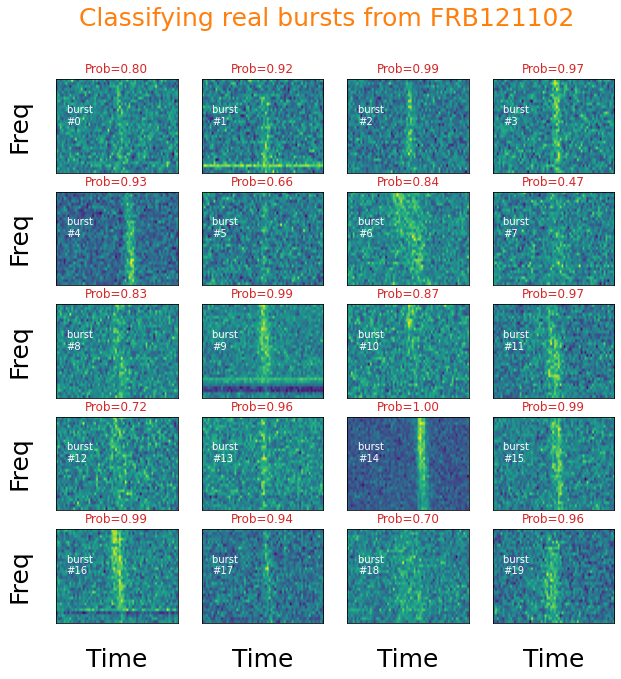

In [ ]:
ncand_121102, nfreq, nt = data_121102.shape
plt.figure(figsize=(10,10))

print("Classifying FRB121102 bursts")
prob_of_frb = model_freq_time.predict(data_121102[..., None])

for ii in range(ncand_121102):
    plt.subplot(5,4,ii+1)
    plt.imshow(data_121102[ii, :, nt//2-32:nt//2+32], aspect='auto')
    plt.title('Prob=%0.2f' % prob_of_frb[ii,1], color='C3')
    plt.yticks([])
    plt.xticks([])
    if ii%4==0:
        plt.ylabel('Freq', fontsize=25, labelpad=25)
    if ii>15:
        plt.xlabel('Time', fontsize=25, labelpad=25)
    plt.text(5, 15, "burst \n#%d"%ii, color='white')

plt.suptitle('Classifying real bursts from FRB121102', color='C1', fontsize=25)
plt.show()

# **Ensure that our model doesn't just think that everything is an FRB!**

# **Since we only trained on 1/4th of the data, let's classify the remaining RFI triggers from the training set to see if it correctly flags them as non-astronomical**

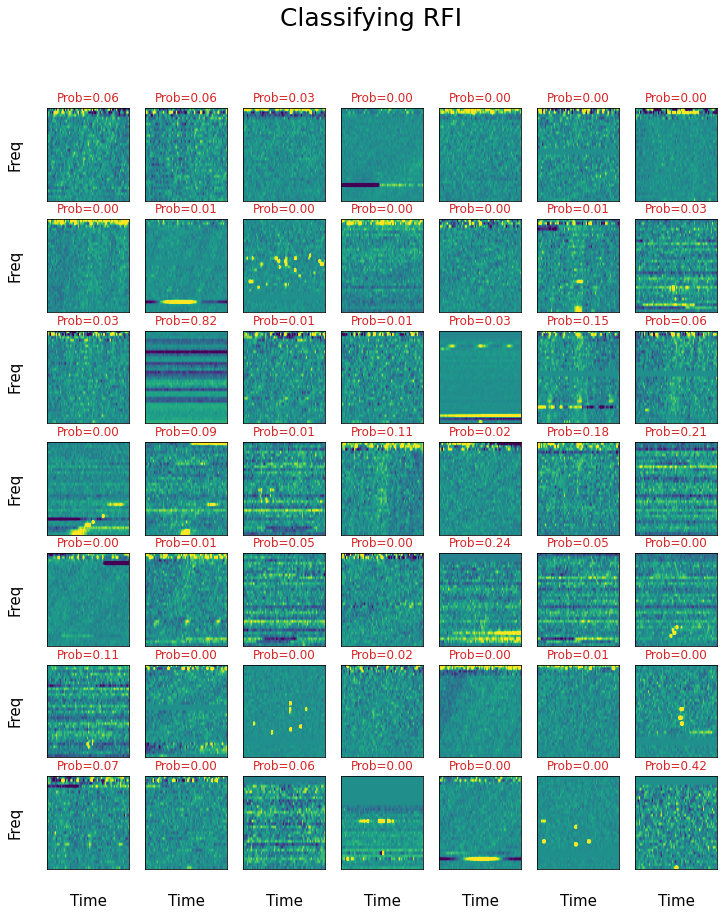

In [ ]:
# Select known RFI triggers that were not in the training set
data_rfi_test = x_test[y_test[:,1]==0]

# Select a random subset of 49 to plot
ncand = len(data_rfi_test)
nplot = 49
ind = np.random.randint(0, ncand, nplot)

# prob_of_frb[:, ii] is the probability of class ii
prob_of_frb = model_freq_time.predict(data_rfi_test)

plt.figure(figsize=(12,14))

for ii in range(nplot):
    plt.subplot(7,7,ii+1)
    plt.imshow(data_rfi_test[ind[ii],:,:,0], aspect='auto', vmax=3, vmin=-3)
    plt.title('Prob=%0.2f' % prob_of_frb[ind[ii],1], color='C3')
    plt.yticks([])
    plt.xticks([])
    if ii%7==0:
        plt.ylabel('Freq', fontsize=15, labelpad=25)
    if ii>41:
        plt.xlabel('Time', fontsize=15, labelpad=25)

plt.suptitle('Classifying RFI', color='k', fontsize=25)
plt.show()